## Single-Neuron Neural Network for Classification 

#### 1.

#### The code cell below imports standard libraries required by the single-neuron classifier designed and implemented in this Jupyter Notebook. A brief description of each library is provided below:

* #### ```ucimlrepo```: This library is used to easily access and load datasets from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/) directly into Python for machine learning experiments and analysis.
* #### ```pandas```: Esta librería se utiliza para manipulación de datos y análisis de los mismos.
* #### ```plotply.express```: Esta librería se utiliza para crear visualizaciones interactivas con código muy breve.
* #### ```matplotlib.pyplot```: Esta librería se utiliza para crear visualizaciones estáticas, animadas e interactivas.
* #### ```numpy```: Esta librería se especializa en el calculo numerico y el analisis de datos, especialmente para un gran volumen de datos.
* #### ```tensorflow```: Esta libreria es utilizada para facilitar la creación de modelos de aprendizaje automático e inteligencia artificial
* #### ```sklearn```: Esta libreria es utilizada para el aprendizaje automatico, proporcionando herramientas para clasificación, regresión, entre otros.

In [ ]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

#### 2. En esta celda se utiliza la librería ucimlrepo para importar el dataset mediante la función fetch_ucirepo con la semilla de reproductibilidad 357. Ademas se guarda en una variable data donde se asegura que sean los datos originales (sin cambios) con .data.original.
For further information regarding this dataset, visit the UC Irving Machine Learning Repository [here](https://archive.ics.uci.edu/dataset/357/occupancy+detection).

In [2]:
occupancy_detection = fetch_ucirepo(id=357) 
data = occupancy_detection.data.original

#### 3. Al principio de esta celda se eliminan las columnas date y id. El parámetro axis especifica si es columna (1) o fila (0). Posteriormente, mediante la función errors='coerce' de pandas, cambia aquellos valores que no sean numeros por NaN.


In [3]:
df = data.drop(['date', 'id'], axis=1)
df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce')
df = df.dropna()

#### 3a. Se imprime la tabla ya modificada. Usualmente se hace para confimar los cambios,que todo este de manera correcta en los datos, y ver el tamaño de los datos.


In [4]:
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.180,27.2720,426.00,721.25,0.004793,1.0
1,23.150,27.2675,429.50,714.00,0.004783,1.0
2,23.150,27.2450,426.00,713.50,0.004779,1.0
3,23.150,27.2000,426.00,708.25,0.004772,1.0
4,23.100,27.2000,426.00,704.50,0.004757,1.0
...,...,...,...,...,...,...
20557,20.815,27.7175,429.75,1505.25,0.004213,1.0
20558,20.865,27.7450,423.50,1514.50,0.004230,1.0
20559,20.890,27.7450,423.50,1521.50,0.004237,1.0
20560,20.890,28.0225,418.75,1632.00,0.004279,1.0


#### 3b. En esta celda, se utiliza la función describe() para, como dice su nombre, describir los datos de manera estadistica, donde: 

- #### count: The number of non-null values.

- #### mean: The average value.

- #### std: The standard deviation, indicating the spread of data.

- #### min: The minimum value.

- #### 25% (Q1): The first quartile, representing the 25th percentile.

- #### 50% (Median/Q2): The median, representing the 50th percentile.

- #### 75% (Q3): The third quartile, representing the 75th percentile.

- #### max: The maximum value.


Información extraída de internet, proporcionada por META.

In [5]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


#### 3c. 
#### Línea 1: Dentro de la variable features, se utiliza .drop() al igual que en la otra celda pero ahora para quitar la columna (axis=1) Occupancy y luego con .columns se especifica que se guarden los nombres de las columnas.

#### Línea 2: Dentro de la variable fig se genera una matriz de dispersión, utilizando el set de datos con data_frame, las columnas se definen con dimensions la cual fue definida con la variable features, y el color depende de los valores de la columna Occupancy.

#### Línea 3: La función update_traces actualiza algunas caracteristicas de los gráficos de la matriz de la siguiente manera:

- #### Marker: especifica el tamaño de los puntos (4).

- #### diagonal_visible: especifica si la diagonal de la matriz donde se compara la variable contra si misma, será mostrada (True) o no (False).
- #### showupperhalf: especifica si se mostrará (True) o no (False), la parte de arriba de la matriz, la cual muestra la misma información.

#### Línea 4: La función update_layout ajusta las dimensiones y propiedades del gráfico. 
- #### width: ancho
- #### height: alto
- #### title: título
- #### font_size: tamaño de la fuente

#### Línea 5: Muestra la figura.

In [6]:
features = df.drop(["Occupancy"], axis=1).columns
fig = px.scatter_matrix(data_frame=df, 
                        dimensions=features, 
                        color=df['Occupancy'])
fig.update_traces(marker = dict(size=4), diagonal_visible=False, showupperhalf=False)
fig.update_layout(width=900, height=600, title="Occupancy Detection", font_size=9)
fig.show()

#### 3d. 
#### plt.hist: crea un histograma de la variable Occupancy.
#### plt.xlabel: define el nombre del eje x.
#### plt.ylabel: define el nombre del eje y.

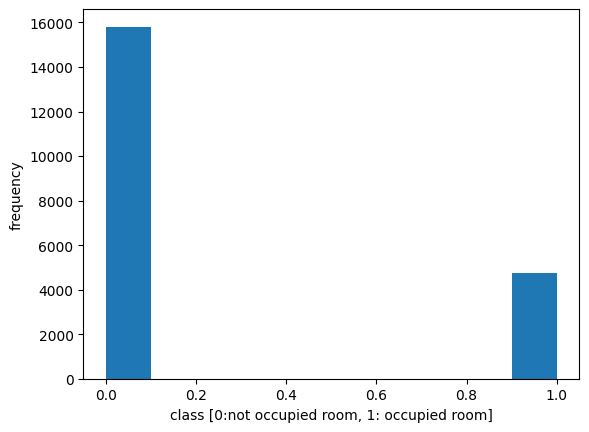

In [27]:
plt.hist(df['Occupancy']);
plt.xlabel('class [0:not occupied room, 1: occupied room]')
plt.ylabel('frequency');

#### 4a. La función random.set_seed especifica una semilla global para que tenga una secuencia única aleatoria.


In [8]:
tf.random.set_seed(4500)

#### 4b. Se crea la variable "X" que toma todos los datos de df a exepción de la columna Occupancy que fue extraída con .drop. Del mismo modo, se crea la variable "y", extrayendo unicamente la columna Occupancy de df.


In [9]:
X = df.drop(["Occupancy"], axis=1)
y = df['Occupancy']

#### 4c. Dentro de las variables definidas, con la función train_test_split se hace una separación de los datos en entrenamiento y prueba. Test_size especifica que el 20% de los datos serán de prueba, random state especifica la reproducibilidad de la separación, y shuffle asegura que los datos sean sorteados antes de separarlos. 


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

#### 4d. La clase StandardScaler se utiliza para escalar los datos utilizando la media y la desviación estándar. Al utilizar la función fit_transform se está aplicando primero un fit() para calcular los estadísticos mencionados, y luego un transform() en esos mismos datos para modificarlos en base a lo que se calculó anteriormente. En la ultima línea, se aplica el transform unicamente a los datos de prueba para asegurar que tengan las mismas dimensiones.


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 4e. En esta celda se define una función llamada get_model. Dentro de esta función se crea la variable model con un modelo Sequential (las capas se organizan de manera lineal). InputLayer, especifica la capa de entrada con tamaño de 5. Dense, añade una capa densa donde el numero de neuronas de salida es 1 y la función de activación es sigmoidal.


In [ ]:
def get_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(5,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

#### 4f. La variable model manda a llamar la función que se creo anteriormente y ahora eso es lo que contiene dicha variable. Posteriormente, se imprime un resumen del modelo con .summary().


In [13]:
model = get_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

#### 4g. En esta celda la función compile permite configurar el modelo con ciertos parámetros. La selección de optimizer permite definir el algoritmo que se utiliza para ajustar los pesos del modelo en entrenamiento, adam es un optimizador que se basa en el método de gradiente descendiente. Loss permite definir la función de perdida, en este caso, binary_crossentropy mide las probabilidades predichas por el modelo y las verdaderas. Metrics es el método para evaluar el rendimiento, en este caso se utiliza accuracy.


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### 4h. En esta celda se evaluan los datos de prueba con el modelo guardando en variables la pérdida (loss) y accuracy. Posteriormente, se imprime la variable accuracy.


In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.3806 - loss: 1.1163
Test Accuracy: 0.3806


#### 4i. En esta celda se entrena el modelo con los datos de entrenamiento. Se especifica las epochs en 50, es decir, hará 50 pasadas completas sobre los datos. Se especifica el batch_size en 32, significa que el modelo procesa 32 muestras a la vez. Por último, es especifica validation_split en 0.2 y esto se refiere a que el 20% de los datos se utilizarán para validación durante el entrenamiento.


In [16]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.20)

Epoch 1/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4813 - loss: 0.8204 - val_accuracy: 0.6970 - val_loss: 0.5897
Epoch 2/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8347 - loss: 0.4709 - val_accuracy: 0.8769 - val_loss: 0.3911
Epoch 3/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8919 - loss: 0.3395 - val_accuracy: 0.8942 - val_loss: 0.3013
Epoch 4/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9113 - loss: 0.2698 - val_accuracy: 0.9149 - val_loss: 0.2451
Epoch 5/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9305 - loss: 0.2232 - val_accuracy: 0.9456 - val_loss: 0.2051
Epoch 6/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9546 - loss: 0.1892 - val_accuracy: 0.9587 - val_loss: 0.1752
Epoch 7/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9645 - loss: 0.1633 - val_accuracy: 0.9660 - val_loss: 0.1520
Epoch 8/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9702 - loss: 0.1430 - val_accuracy: 0.

#### 4j. En esta celda de imprimen los pesos obtenidos en el modelo por el entrenamiento.


In [17]:
print(model.get_weights())

[array([[-0.72012305],
       [ 0.3889095 ],
       [ 4.513245  ],
       [ 0.99469936],
       [ 0.01512358]], dtype=float32), array([-3.9783924], dtype=float32)]


#### 4k. En esta celda se crea una figura de 12x6. Dentro de la misma, se grafican dos histogramas: uno con accuracy y otro con val_accuracy. Se definen las etiquetas de los ejes, se agregan leyendas y se activa el grid.


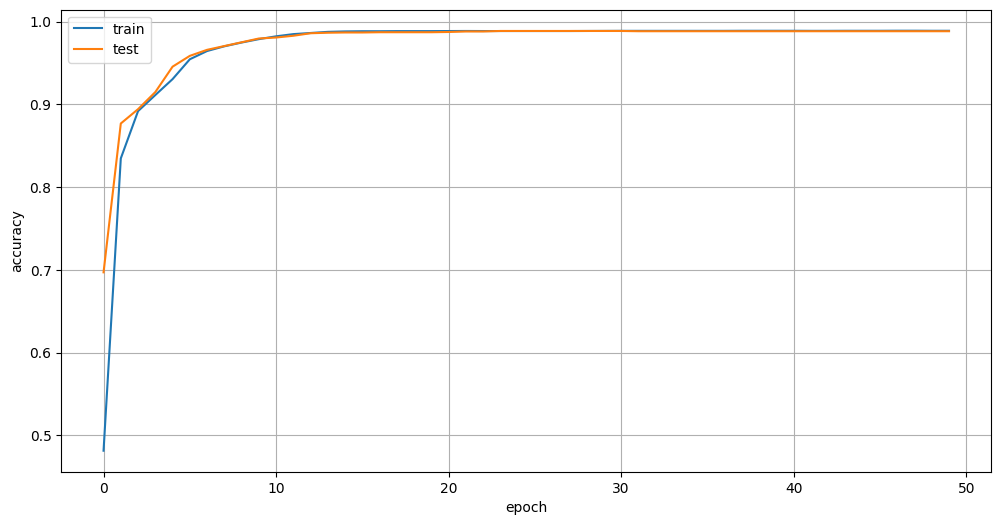

In [18]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid();

#### 4l. En esta celda ocurre lo mismo que la anterior pero ahora se grafica loss y val_loss.


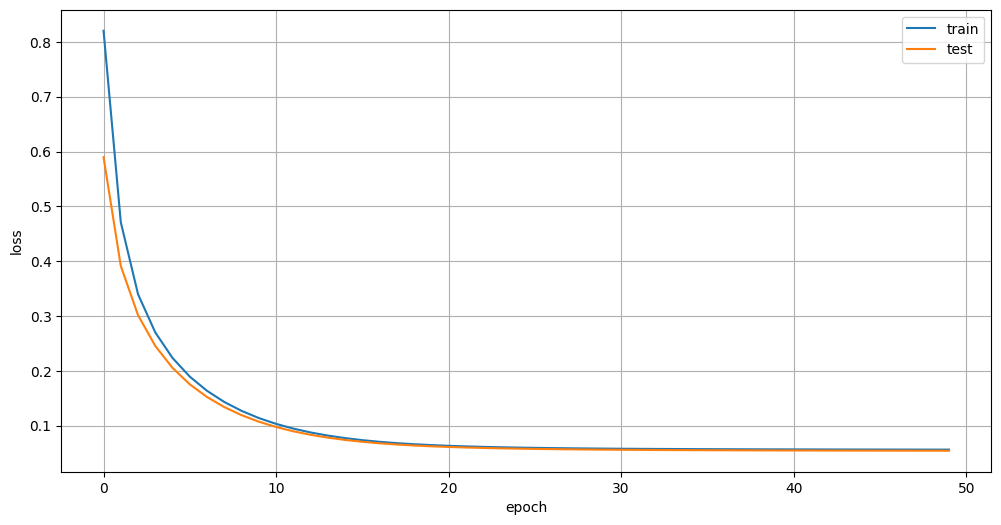

In [19]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid();

#### 4m. Se vuelve a evaluar el modelo con los datos de prueba pero se utiliza el modelo ya entrenado y nuevamente se imprime la accuracy.


In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.9895 - loss: 0.0487
Test Accuracy: 0.9895


#### 4n. 
#### Línea 1: Se crea la variable indx donde se crea un número entero aleatorio con la función .random.randint(), se especifica el limite inferior (0) y el limite superior se define como el total de filas en los datos y_test.

#### Línea 2: Se selecciona una muestra de X_test que se convierte en un arreglo para el cual se utiliza indx como el número de fila donde se seleccionarán todas las columnas, especificado por ":".

#### Línea 3: Se crea la variable predicción, la cual usa el modelo entrenado para hacer una predicción a partir de xi.

#### Línea 4: Se imprimen los resultados. La función y_test.iloc[index] muestra la etiqueta de la muestra que se seleccionó de manera aleatoria.


In [21]:
indx = np.random.randint(low=0, high=y_test.shape[0])
xi = np.array([X_test[indx,:]])
prediction = model.predict(xi)
print(f"Input: {xi} \t Target: {y_test.iloc[indx]} \t Prediction: {prediction[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Input: [[-0.6726278   0.59457386 -0.62088614  0.14219651  0.32849424]] 	 Target: 0.0 	 Prediction: 0.0027


#### 5. En esta celda de importa la función confusion_matrix de la libreria sklearn.metrics. Se crea una variable y_predictions que genera predicciones para cada muestra de x_test que sean mayor a 0.5. Finalmente, se crea la variable c_matrix que es donde se utiliza la función importada para calcular la matriz de confusión, comparando los valores reales con los predichos. 


In [22]:
from sklearn.metrics import confusion_matrix

y_predictions = model.predict(X_test) > 0.5
c_matrix = confusion_matrix(y_true=y_test, y_pred=y_predictions)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step


#### 5a. Se crea la variable display_matrix para guardar la visualización de la matriz de confusión utilizando ConfusionMatrixDisplay. Luego, esta variable se muestra como gráfico con .plot().


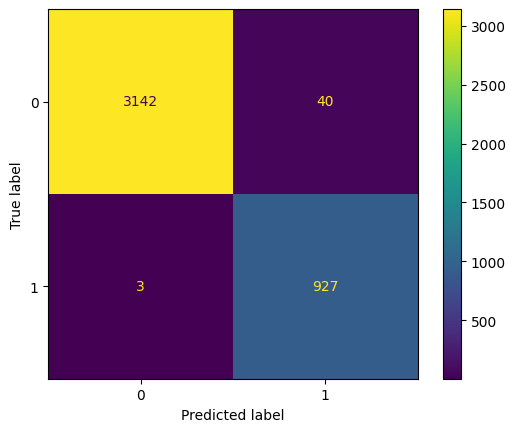

In [23]:
display_matrix = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
display_matrix.plot()

#### 5b. En esta celda se define una función que toma de entrada la matriz de confusión. Dentro de ella se definen las variables tn, fp, fn, y tp (True Negative, False Positive, False Negative y True Positive), donde se extrae cada valor de cada fila y columna correspondiente a cada elemento para ser almacenados en las variables. Posteriormente, se realizan los cálculos de las métricas, utilizando las variables creadas. Por ultimo, en la celda se imprimen las variables con 6 decimales cada una.


In [24]:
def get_performance_metrics(c_matrix):
    tn, fp, fn, tp = c_matrix[0][0], c_matrix[0][1], c_matrix[1][0], c_matrix[1][1]

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1_score = 2 * (precision * recall)/(precision + recall)
    return accuracy, precision, recall, specificity, f1_score

accuracy, precision, recall, specificity, f1_score = get_performance_metrics(c_matrix)

print(f"Accuracy: {accuracy:0.6f}")
print(f"Precision: {precision:0.6f}")
print(f"Recall: {recall:0.6f}")
print(f"Specificity: {specificity:0.6f}")
print(f"F1-score: {f1_score:0.6f}")

Accuracy: 0.989543
Precision: 0.958635
Recall: 0.996774
Specificity: 0.987429
F1-score: 0.977333


### 6. Add your comments here
Por ultimo, se guarda el modelo con .save y especificando el nombre del mismo, con el motivo de poder utilizarlo en un futuro.

In [29]:
model.save('single-neuron-model-occupancy-detection.keras')

### Conclusions:

Esta actividad me permitió conocer cada una de las funciones utilizadas para el diseño de un modelo de red neuronal que emplea una neurona. Algunas funciones utilizadas ya las habia empleado con anterioridad y recordaba su funcionamiento, sin embargo, para la gran mayoría fue necesario investigar sobre su uso y parámetros para comprender que era lo que estaba sucediendo en cada celda. Considero que la actividad fue muy enriquecedora en conocimientos de funciones en python y quisiera poder ampliar mis conocimientos en otros parámetros que pueden usarse o funciones alternativas que tambien son utilizadas en este tipo de casos. 